In [15]:
import sys
sys.path.append('../src/')

from preprocessing import filter_rare_genes, normalize_by_library_size, filter_high_mito_cells, log_transform

In [16]:
from data_loading import load_10x_data

DATA_PATH = '../data/'

# Load raw 10x counts
raw_data = load_10x_data(DATA_PATH)

raw_data.shape

(5000, 33538)

In [17]:
clean_data = filter_rare_genes(raw_data)

clean_data.shape

[Filter Genes] Dropped 12212 genes expressed in < 1 cells.


(5000, 21326)

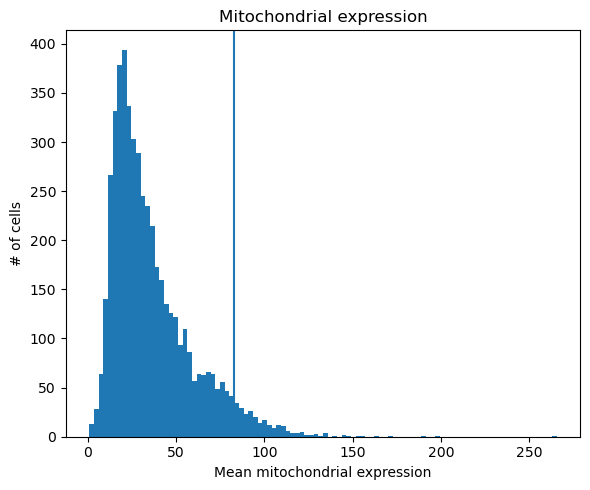

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# get mitochondrial genes
mitochondrial_gene_list = np.array([g.startswith('MT-') for g in clean_data.columns])

# get expression
mito_exp = clean_data.loc[:,mitochondrial_gene_list].mean(axis=1)

# plotting
fig, ax = plt.subplots(1, figsize=(6,5))

ax.hist(mito_exp, bins=100)
cutoff_value = float(np.percentile(mito_exp, 95))
ax.axvline(cutoff_value)
ax.set_xlabel('Mean mitochondrial expression')
ax.set_ylabel('# of cells')
ax.set_title('Mitochondrial expression')

fig.tight_layout()

In [19]:
# Check the first 10 gene names
print("First 10 genes:", clean_data.columns[:10].tolist())

# Check if any start with "MT-"
print("Count of 'MT-' genes:", clean_data.columns.str.startswith('MT-').sum())

# Check if any start with "mt-" (Mouse)
print("Count of 'mt-' genes:", clean_data.columns.str.startswith('mt-').sum())

First 10 genes: ['AL627309.1', 'AL627309.3', 'AL627309.4', 'AL669831.5', 'FAM87B', 'LINC00115', 'FAM41C', 'AL645608.3', 'SAMD11', 'NOC2L']
Count of 'MT-' genes: 13
Count of 'mt-' genes: 0


In [20]:
data_mito_filtered = filter_high_mito_cells(clean_data)

data_mito_filtered.shape

[Filter Mito]  Cutoff: 0.0997
[Filter Mito]  Dropped 250 cells (Top 5% mitochondrial expr).


(4750, 21326)

In [21]:
normalized_data = normalize_by_library_size(data_mito_filtered)

normalized_data.shape

[Normalize]   Normalizing library size (CPM) with rescale=1e+06...


(4750, 21326)

In [22]:
final_data = log_transform(normalized_data)

final_data.shape

[Transform]   Applying log transform (log1+x)...


(4750, 21326)

In [23]:
final_data.head()

,AL627309.1,AL627309.3,AL627309.4,AL669831.5,FAM87B,LINC00115,FAM41C,AL645608.3,SAMD11,NOC2L,...,AC145212.1,MAFIP,AC011043.1,AL592183.1,AC007325.4,AL354822.1,AC004556.1,AC233755.2,AC233755.1,AC240274.1
0,,,,,,,,,,,,,,,,,,,,,
L1_AAAGAACTCAAGTAAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
L1_AAAGGGCTCGTACACA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.214842,0.0,0.0,0.0,0.0,0.0,0.0
L1_AAAGGTAAGCTCAGAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
L1_AAAGGTAGTGTCCCTT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
L1_AAAGTGACATCTTAGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
